In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
pd.set_option('max_rows',1200)
pd.set_option('max_columns',1000)

In [2]:
df=pd.read_csv('C:/Users/ohm/Downloads/Machine Learning Exercises/attachment_ML_attachment_Project/Loan Payment/Loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


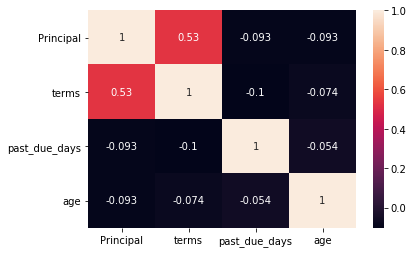

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr=df.corr()
sns.heatmap(corr,annot=True)

In [4]:
df.fillna('0',axis=1,inplace=True)

In [5]:
df.sample(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
349,xqd20160350,COLLECTION,800,15,9/11/2016,9/25/2016,0,74,29,college,male
136,xqd20160137,PAIDOFF,800,15,9/11/2016,9/25/2016,9/25/2016 13:00,0,32,High School or Below,female
192,xqd20160193,PAIDOFF,1000,15,9/12/2016,9/26/2016,9/14/2016 20:31,0,25,High School or Below,female
433,xqd20160434,COLLECTION_PAIDOFF,1000,30,9/11/2016,10/10/2016,10/12/2016 14:32,2,29,college,male
275,xqd20160276,PAIDOFF,800,15,9/14/2016,9/28/2016,9/27/2016 15:52,0,44,college,male
80,xqd20160081,PAIDOFF,1000,30,9/11/2016,10/10/2016,9/21/2016 16:18,0,28,High School or Below,male
281,xqd20160282,PAIDOFF,1000,15,9/14/2016,9/28/2016,9/28/2016 9:00,0,28,Bechalor,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,High School or Below,male
473,xqd20160474,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:02,3,30,High School or Below,male
471,xqd20160472,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,11/4/2016 14:46,24,27,Bechalor,male


In [6]:
# Printing no of records for different columns
print(df['Gender'].value_counts())
print(df['education'].value_counts())
print(df['Principal'].value_counts())
print(df['loan_status'].value_counts())
print(df['terms'].value_counts())

male      423
female     77
Name: Gender, dtype: int64
college                 220
High School or Below    209
Bechalor                 67
Master or Above           4
Name: education, dtype: int64
1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64
PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64
30    272
15    207
7      21
Name: terms, dtype: int64


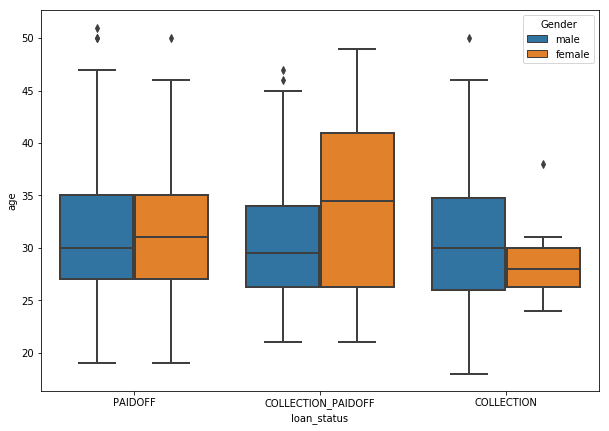

In [7]:
# Boxplot to show loan status based on gender
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='loan_status',y='age',hue='Gender',linewidth=2,order=['PAIDOFF','COLLECTION_PAIDOFF','COLLECTION'])
plt.show()

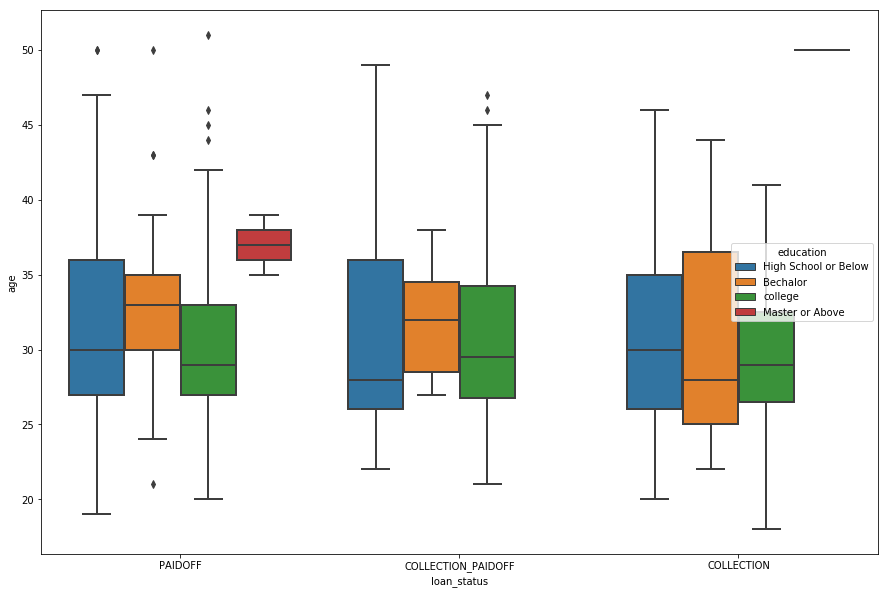

In [8]:
# Boxplot to show loan status based on education
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='loan_status',y='age',hue='education',linewidth=2
            ,order=['PAIDOFF','COLLECTION_PAIDOFF','COLLECTION'])
#           ,order=['High School or Below','college','Bechalor','Master or Above'])
plt.show()

<Figure size 4320x1440 with 0 Axes>

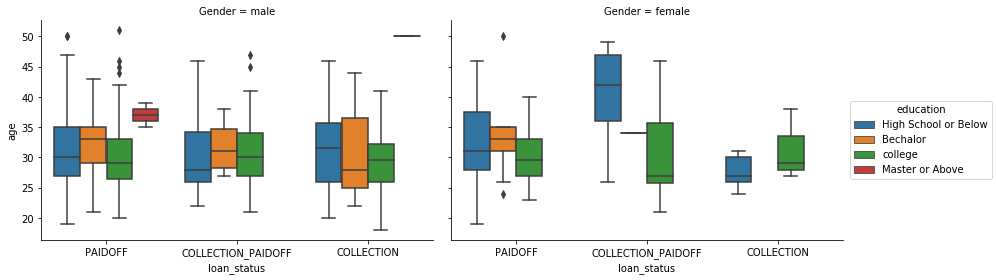

In [9]:
# Only male has 'master' degree and paidoff loan on time
plt.figure(figsize=(60,20))
sns.factorplot(data=df,x='loan_status',y='age',hue='education',col='Gender',kind='box'
               ,order=['PAIDOFF','COLLECTION_PAIDOFF','COLLECTION'],aspect=1.5)
plt.show()

<Figure size 4320x1440 with 0 Axes>

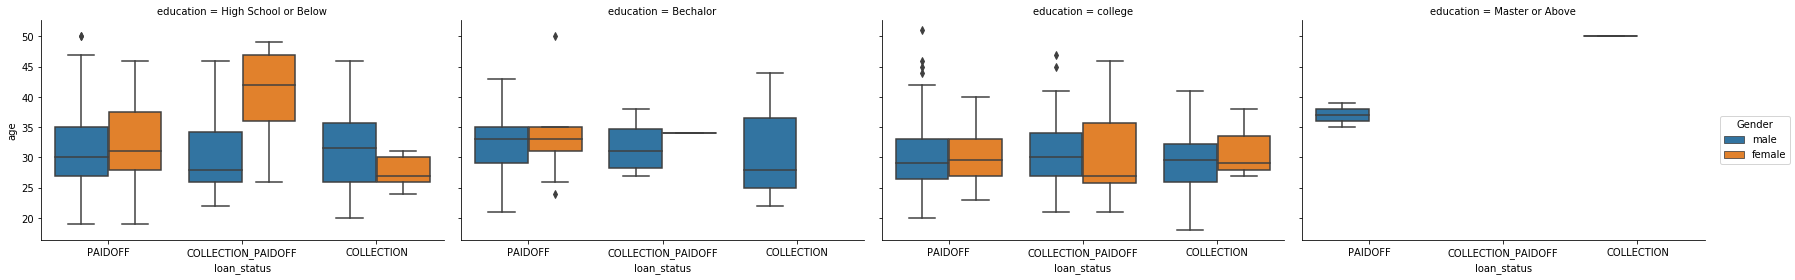

In [10]:
plt.figure(figsize=(60,20))
sns.factorplot(data=df,x='loan_status',y='age',hue='Gender',col='education',kind='box'
               ,order=['PAIDOFF','COLLECTION_PAIDOFF','COLLECTION'],aspect=1.5)
plt.show()

In [11]:
#Count of males/females paying loan after due dates(1,2,3,4.....etc)
# Maximum count is '59' days after due date for both male and female
pd.crosstab(df['Gender'],df['past_due_days'],rownames=['gender'], colnames=['Loan paidafter due date'])

Loan paidafter due date,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,14.0,19.0,23.0,24.0,25.0,27.0,28.0,29.0,36.0,38.0,44.0,51.0,52.0,56.0,58.0,59.0,60.0,61.0,73.0,74.0,75.0,76.0,0
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,5,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,6,0,0,0,2,2,0,53
male,13,18,13,8,4,2,2,1,1,2,2,3,1,1,2,2,3,1,6,1,1,3,1,1,1,2,34,13,2,1,23,5,3,247


In [12]:
# Loan status and count based on gender
# Close to 90% defaulters are 'MALE'; naturally because male comprise '85%' of total loan records
pd.crosstab(df['Gender'],df['loan_status'],rownames=['gender'], colnames=['loan status'])

loan status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
gender,,,
female,10,14,53
male,90,86,247


In [13]:
# Less people took 7 days loan, and hence less defaulters, most defaulters have '30' day loan term
pd.crosstab(df['terms'],df['loan_status'],rownames=['terms'], colnames=['loan status'])

loan status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
terms,,,
7,0,1,20
15,41,39,127
30,59,60,153


In [14]:
# Mostly people took '1000' principal/amount of loan and as below data shows most defaulters for this
pd.crosstab(df['Principal'],df['loan_status'],rownames=['principal'],colnames=['loan status'])

loan status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
principal,,,
300,0,0,6
500,0,1,2
700,0,0,1
800,23,19,69
900,0,0,2
1000,77,80,220


In [15]:
# High school and college ones are among most defaulters
pd.crosstab(df['education'],df['loan_status'],rownames=['education'],colnames=['loan status'])

loan status,COLLECTION,COLLECTION_PAIDOFF,PAIDOFF
education,,,
Bechalor,11,15,41
High School or Below,49,37,123
Master or Above,1,0,3
college,39,48,133


In [16]:
# Various education levels for the loan takers based on gender
pd.crosstab(df['education'],df['Gender'],rownames=['education'],colnames=['gender'])

gender,female,male
education,,
Bechalor,13,54
High School or Below,31,178
Master or Above,0,4
college,33,187


In [17]:
# Below tab shows in which age(26-30 for men; 26-35 for women) maximum loans are taken
pd.crosstab(df['Gender'],df['age'],rownames=['gender'],colnames=['age'])

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,0,1,0,1,0,2,3,2,8,9,2,3,5,6,4,5,4,4,2,3,3,0,1,0,1,1,2,0,2,1,1,1,0
male,1,1,4,6,8,8,20,18,38,29,30,39,32,16,16,25,21,22,12,16,16,10,7,5,3,4,2,5,3,2,0,3,1


In [18]:
df.head().append(df.tail()).append(df.sample(10))

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8,28,High School or Below,male


In [19]:
# Replacing 'loan status' with numerical values
df['loan_status'].replace('PAIDOFF',0,inplace=True)
df['loan_status'].replace('COLLECTION_PAIDOFF',1,inplace=True)
df['loan_status'].replace('COLLECTION',2,inplace=True)
df.sample(20)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
471,xqd20160472,1,1000,30,9/12/2016,10/11/2016,11/4/2016 14:46,24,27,Bechalor,male
445,xqd20160446,1,1000,15,9/11/2016,9/25/2016,9/27/2016 17:24,2,29,college,male
41,xqd20160042,0,800,15,9/11/2016,9/25/2016,9/25/2016 14:36,0,30,college,male
317,xqd20160318,2,1000,15,9/10/2016,9/24/2016,0,75,29,High School or Below,male
88,xqd20160089,0,800,15,9/11/2016,9/25/2016,9/21/2016 9:35,0,43,Bechalor,male
224,xqd20160225,0,1000,30,9/12/2016,10/11/2016,10/9/2016 10:00,0,33,Bechalor,male
113,xqd20160114,0,1000,30,9/11/2016,10/10/2016,10/10/2016 13:01,0,33,college,male
142,xqd20160143,0,1000,7,9/11/2016,9/17/2016,9/15/2016 20:36,0,27,High School or Below,male
466,xqd20160467,1,1000,30,9/12/2016,10/11/2016,10/15/2016 9:48,4,26,High School or Below,male
399,xqd20160400,2,1000,30,9/12/2016,10/11/2016,0,58,26,college,male


In [20]:
education_dummies=pd.get_dummies(df.education,prefix='education')
education_dummies.sample(4)

,education_Bechalor,education_High School or Below,education_Master or Above,education_college
349,0,0,0,1
428,0,1,0,0
145,0,0,0,1
77,0,0,0,1


In [21]:
education_dummies.drop(education_dummies.columns[0],axis=1,inplace=True)

In [22]:
education_dummies.head(5)

,education_High School or Below,education_Master or Above,education_college
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,1


In [23]:
df=pd.concat([df,education_dummies],axis=1)
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,education_High School or Below,education_Master or Above,education_college
0,xqd20166231,0,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0,45,High School or Below,male,1,0,0
1,xqd20168902,0,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0,50,Bechalor,female,0,0,0
2,xqd20160003,0,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0,33,Bechalor,female,0,0,0
3,xqd20160004,0,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0,27,college,male,0,0,1
4,xqd20160005,0,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0,28,college,female,0,0,1


In [24]:
df.drop(df.columns[9],axis=1,inplace=True)
df.sample(15)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,Gender,education_High School or Below,education_Master or Above,education_college
229,xqd20160230,0,800,15,9/12/2016,9/26/2016,9/26/2016 9:00,0,26,male,0,0,1
60,xqd20160061,0,1000,30,9/11/2016,10/10/2016,9/30/2016 21:12,0,34,male,0,0,0
18,xqd20160019,0,1000,30,9/10/2016,10/9/2016,10/5/2016 22:05,0,32,male,1,0,0
78,xqd20160079,0,1000,30,9/11/2016,10/10/2016,9/30/2016 14:29,0,37,female,0,0,1
443,xqd20160444,1,1000,30,9/11/2016,10/10/2016,11/7/2016 19:21,28,26,female,0,0,1
491,xqd20160492,1,1000,30,9/12/2016,10/11/2016,11/9/2016 13:41,29,27,male,0,0,1
192,xqd20160193,0,1000,15,9/12/2016,9/26/2016,9/14/2016 20:31,0,25,female,1,0,0
284,xqd20160285,0,1000,15,9/14/2016,9/28/2016,9/27/2016 22:50,0,24,male,0,0,0
176,xqd20160177,0,1000,30,9/12/2016,10/11/2016,10/11/2016 16:00,0,38,male,1,0,0
59,xqd20160060,0,800,15,9/11/2016,9/25/2016,9/22/2016 6:38,0,39,male,0,1,0


In [25]:
# Dummification for gender column
gender_dummies=pd.get_dummies(df['Gender'],prefix='gender')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)
gender_dummies.head()

,gender_male
0,1
1,0
2,0
3,1
4,0


In [26]:
df=pd.concat([df,gender_dummies],axis=1)
df.sample(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,Gender,education_High School or Below,education_Master or Above,education_college,gender_male
5,xqd20160706,0,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,0,35,male,0,1,0,1
442,xqd20160443,1,1000,30,9/11/2016,10/10/2016,10/11/2016 11:48,1,24,male,1,0,0,1
243,xqd20160244,0,800,15,9/12/2016,9/26/2016,9/25/2016 19:31,0,30,female,1,0,0,0
175,xqd20160176,0,800,15,9/12/2016,9/26/2016,9/26/2016 13:00,0,25,male,0,0,1,1
380,xqd20160381,2,1000,30,9/11/2016,10/10/2016,0,59,25,male,1,0,0,1
172,xqd20160173,0,800,15,9/12/2016,9/26/2016,9/26/2016 13:00,0,35,male,1,0,0,1
374,xqd20182575,2,1000,30,9/11/2016,10/10/2016,0,59,29,male,0,0,1,1
107,xqd20160108,0,1000,30,9/11/2016,10/10/2016,10/10/2016 9:01,0,31,male,1,0,0,1
103,xqd20160104,0,1000,15,9/11/2016,9/25/2016,9/25/2016 23:48,0,45,male,1,0,0,1
399,xqd20160400,2,1000,30,9/12/2016,10/11/2016,0,58,26,male,0,0,1,1


In [27]:
df.drop(df.columns[9],axis=1,inplace=True)
df.sample(10)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education_High School or Below,education_Master or Above,education_college,gender_male
341,xqd20160342,2,1000,30,9/11/2016,10/10/2016,0,59,25,0,0,1,1
212,xqd20160213,0,1000,30,9/12/2016,10/11/2016,10/10/2016 16:41,0,33,1,0,0,0
359,xqd20160360,2,1000,30,9/11/2016,10/10/2016,0,59,28,1,0,0,1
293,xqd20160294,0,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,0,37,1,0,0,1
315,xqd20160316,2,1000,15,9/10/2016,10/9/2016,0,60,26,1,0,0,1
406,xqd20160407,1,800,15,9/10/2016,9/24/2016,9/26/2016 11:03,2,34,0,0,1,1
386,xqd20160387,2,800,15,9/11/2016,9/25/2016,0,74,46,1,0,0,1
307,xqd20160308,2,1000,30,9/10/2016,10/9/2016,0,60,40,1,0,0,1
291,xqd20160292,0,1000,30,9/14/2016,10/13/2016,10/11/2016 16:33,0,41,1,0,0,1
109,xqd20160110,0,1000,7,9/11/2016,9/24/2016,9/24/2016 13:00,0,29,0,0,1,1


In [28]:
# Assigning target variable to y
y=df['loan_status']

In [29]:
# Assigning input variables to X
cols=['Principal','terms','past_due_days','age','education_High School or Below','education_Master or Above'
         ,'education_college','gender_male']
X=df[list(cols)].values
X

array([[1000, 30, '0', ..., 0, 0, 1],
       [1000, 30, '0', ..., 0, 0, 0],
       [1000, 30, '0', ..., 0, 0, 0],
       ...,
       [800, 15, 3.0, ..., 0, 1, 1],
       [1000, 30, 1.0, ..., 0, 1, 0],
       [1000, 30, 8.0, ..., 0, 0, 1]], dtype=object)

In [30]:
#splitting the data into train and test with 70:30 ratio
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
#calling logistic regression
from sklearn import metrics
logreg = LogisticRegression()

In [32]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
y_pred=logreg.predict(X_test)

In [34]:
# Accuracy score for Logistic regression
print(metrics.accuracy_score(y_pred,y_test))

0.9466666666666667


In [35]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_pred,y_test)
conf

array([[96,  5,  0],
       [ 0, 23,  1],
       [ 0,  2, 23]], dtype=int64)

In [36]:
target_names=['paidoff','collection_paidoff','collection']
print(metrics.classification_report(y_pred,y_test,target_names=target_names))

                    precision    recall  f1-score   support

           paidoff       1.00      0.95      0.97       101
collection_paidoff       0.77      0.96      0.85        24
        collection       0.96      0.92      0.94        25

       avg / total       0.96      0.95      0.95       150



In [37]:
# Applying decision tree algo
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree1=tree.DecisionTreeClassifier()
dt_model=tree1.fit(X_train,y_train)

In [38]:
print(dt_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [39]:
print(dt_model.feature_importances_)
print(dt_model.score(X_train,y_train))

[0.         0.         0.98749953 0.00735113 0.00167005 0.
 0.         0.00347928]
0.9971428571428571


In [40]:
# Accuracy score for Decision tree algo
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred=dt_model.predict(X_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.9866666666666667
[[96  0  0]
 [ 0 29  1]
 [ 0  1 23]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        96
          1       0.97      0.97      0.97        30
          2       0.96      0.96      0.96        24

avg / total       0.99      0.99      0.99       150



In [41]:
# Grid Search on DT
from sklearn.model_selection import GridSearchCV
dt_params={'criterion':['gini','entropy'],'max_depth':range(3,8),'min_samples_split':range(2,6), 'min_samples_leaf':range(1,3)}
tree2=tree.DecisionTreeClassifier()
dt_grid=GridSearchCV(tree2,dt_params,cv=5)
dec_tree=dt_grid.fit(X_train,y_train)

In [42]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [43]:
pred=dec_tree.predict(X_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))


0.9866666666666667
[[96  0  0]
 [ 0 30  2]
 [ 0  0 22]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        96
          1       1.00      0.94      0.97        32
          2       0.92      1.00      0.96        22

avg / total       0.99      0.99      0.99       150



In [59]:
# invoking Support Vector machines(svm)
from sklearn import svm
clf = svm.SVC()
svc_model = clf.fit(X_train,y_train)

In [60]:
print(svc_model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [61]:
sv_pred=svc_model.predict(X_test)
print(accuracy_score(sv_pred,y_test))
print(confusion_matrix(sv_pred,y_test))
print(classification_report(sv_pred,y_test))

0.8866666666666667
[[93 13  0]
 [ 3 17  1]
 [ 0  0 23]]
             precision    recall  f1-score   support

          0       0.97      0.88      0.92       106
          1       0.57      0.81      0.67        21
          2       0.96      1.00      0.98        23

avg / total       0.91      0.89      0.89       150



In [ ]:
# It seems Decision Tree is giving good results when compared to Logistic Regression and SVM